In [44]:
from matplotlib import pyplot as plt
import numpy as np
import japanize_matplotlib
import pandas as pd
import sys
import os
sys.path.append(
    os.path.abspath(
        os.path.join(os.getcwd(), '..', '..')
    )
)
from simple_rnn import SimpleRNN
from trainer import RnnlmTrainer
from common.optimizer import SGD

In [35]:
sys.path

['/usr/lib/python312.zip',
 '/usr/lib/python3.12',
 '/usr/lib/python3.12/lib-dynload',
 '',
 '/media/shota/share/education/ゼロから作るシリーズ/Deep-Learning2/.venv/lib/python3.12/site-packages',
 '/media/shota/share/education/ゼロから作るシリーズ/Deep-Learning2/.venv/lib/python3.12/site-packages/setuptools/_vendor',
 '/media/shota/share/education/ゼロから作るシリーズ/Deep-Learning2',
 '/media/shota/share/education/ゼロから作るシリーズ/Deep-Learning2',
 '..',
 '/media/shota/share/education/ゼロから作るシリーズ/Deep-Learning2',
 '/media/shota/share/education/ゼロから作るシリーズ/Deep-Learning2',
 '/media/shota/share/education/ゼロから作るシリーズ/Deep-Learning2',
 '/media/shota/share/education/ゼロから作るシリーズ/Deep-Learning2',
 '..',
 '..',
 '/media/shota/share/education/ゼロから作るシリーズ/Deep-Learning2',
 '/media/shota/share/education/ゼロから作るシリーズ/Deep-Learning2',
 '/media/shota/share/education/ゼロから作るシリーズ/Deep-Learning2']

In [36]:
df = pd.read_csv("../../data/stock_data.csv")

In [37]:
print(df.columns)
df = df.rename(columns={"Unnamed: 0" : "ymd"})
print(df.columns)

Index(['Unnamed: 0', 'Stock_1', 'Stock_2', 'Stock_3', 'Stock_4', 'Stock_5'], dtype='object')
Index(['ymd', 'Stock_1', 'Stock_2', 'Stock_3', 'Stock_4', 'Stock_5'], dtype='object')


In [38]:
# df.head()
df.info()
df.shape # (365, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ymd      365 non-null    object 
 1   Stock_1  365 non-null    float64
 2   Stock_2  365 non-null    float64
 3   Stock_3  365 non-null    float64
 4   Stock_4  365 non-null    float64
 5   Stock_5  365 non-null    float64
dtypes: float64(5), object(1)
memory usage: 17.2+ KB


(365, 6)

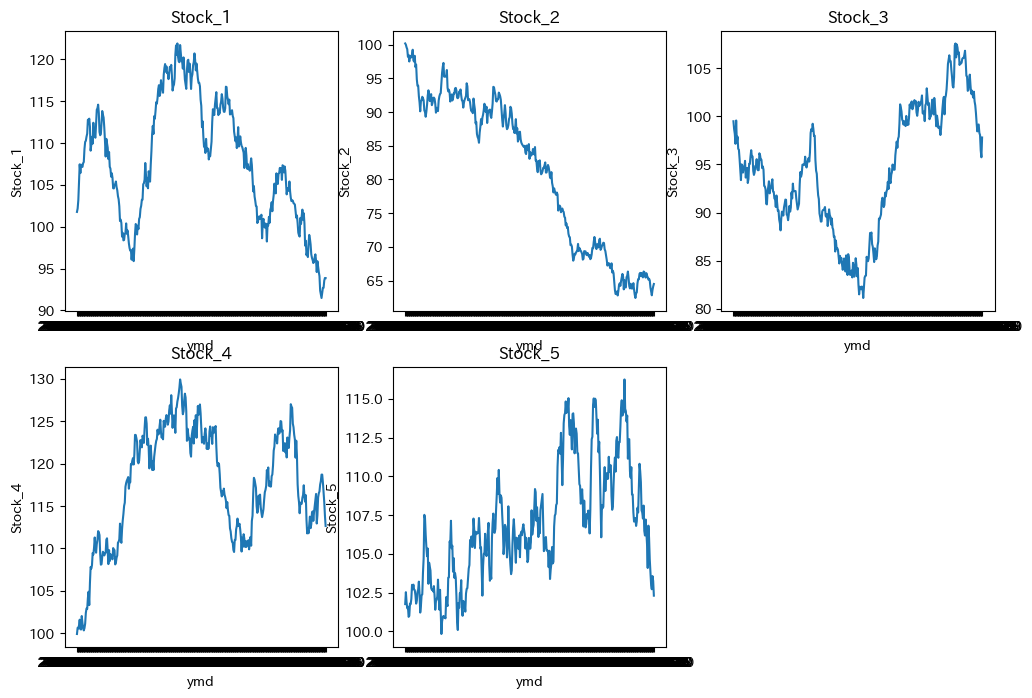

In [39]:
fig_col = 3
fig_index = 2
fig_num = 1
col_num = 1

fig = plt.figure(figsize=(12, 8))

for i in range(1, fig_index + 1):
    for c in range(1, fig_col + 1):

        if fig_num >= (fig_col * fig_index):
            break
        ax1 = fig.add_subplot(fig_index, fig_col, fig_num)
        ax1.set_title(f"{df.columns[col_num]}")
        ax1.set_xlabel(f"{df.columns[0]}")
        ax1.set_ylabel(f"{df.columns[col_num]}")
        ax1.plot(df["ymd"], df.iloc[:, col_num])

        fig_num += 1
        col_num += 1

plt.show()


# stock1を予測する

## 学習の準備

In [40]:
X = df["ymd"].to_numpy()
t = df["Stock_1"].to_numpy().reshape(-1, 1)

In [47]:
max_epoch = 100
max_grad = 1
batch_size = 20
time_size = 5
lr = 0.5
vocab_size = t.shape[1]
wordvec_size = 100
hidden_size = 100

model = SimpleRNN(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

# 学習
trainer.fit(x, t)

TypeError: 'float' object is not callable

$$
L' = \frac{1}{N} * (y_k - \hat{y_k}) * -1
$$